In this homework, we'll be looking at the infamous Titanic dataset. It's become a canonical example for budding data scientists beginning machine learning and will be a good case study in using logistic regression.

From the project description on [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted'):
###Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

As with any start of a data science problem make sure you import your libraries!

In [238]:
%matplotlib inline

In [239]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import additional libraries here if you need them

import seaborn as sns
from seaborn import plt

from sklearn import metrics


Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [240]:
#load data here
#eg from regression lab : 
#x = pd.read_table('http://www.ats.ucla.edu/stat/examples/chp/p054.txt')

df_train = pd.read_csv( 'train.csv')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [241]:
df_test = pd.read_csv( 'test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

In [242]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Viz Survied by Categories

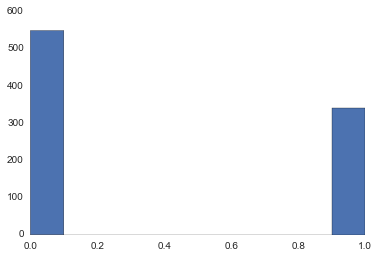

In [243]:
#Code for plot goes here
df_train['Survived'].hist()
#plt.hist(df_train['Survived'])

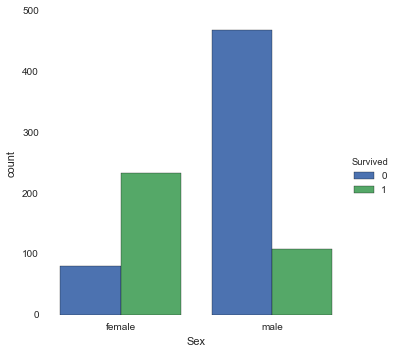

In [244]:
sns.factorplot("Sex", data=df_train, hue="Survived")

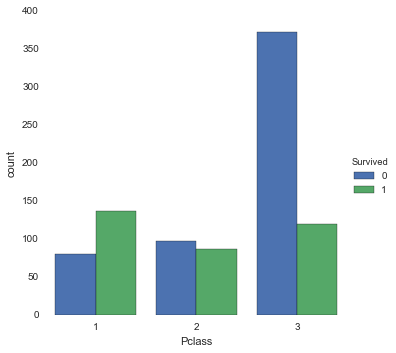

In [245]:
#plt.hist(df_train['Pclass'])
sns.factorplot("Pclass", data=df_train, hue="Survived")

In [246]:
survived_by_class = df_train.groupby("Pclass").Survived.agg(['sum','count'])
survived_by_class['survival_rate'] = survived_by_class['sum'] / survived_by_class['count']
survived_by_class

,sum,count,survival_rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


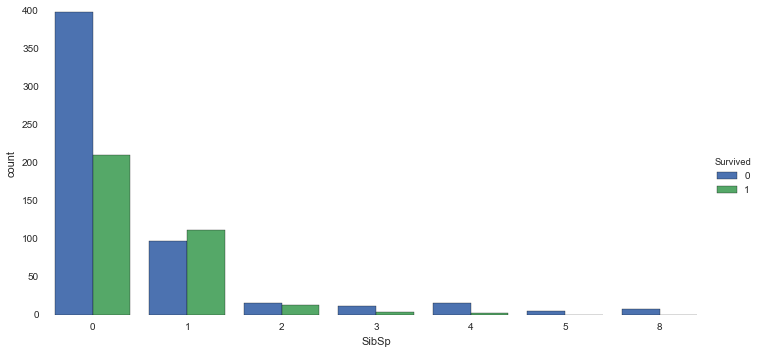

In [247]:
sns.factorplot("SibSp", data=df_train, hue="Survived", aspect=2)

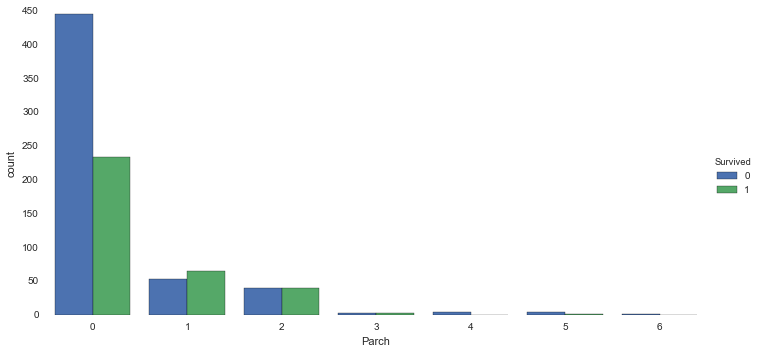

In [248]:
sns.factorplot("Parch", data=df_train, hue="Survived", aspect=2)

#Viz Sex

In [249]:
'''
#view gender, via proportion survived - http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
#fig = plt.figure(figsize=(18,6))
fig = plt.figure(figsize=(12,4))

df_train.Survived[df_train.Sex == 'male'].value_counts()
/float(df_train.Sex[df_train.Sex == 'male'].size).plot(kind='barh',label='Male')

df_train.Survived[df_train.Sex == 'female'].value_counts().plot(kind='barh',label='Female',color='#FA2379') 

plt.title("Survial by Gender (Proportional to Gender Pop)")
plt.legend(loc='best')
'''

'\n#view gender, via proportion survived - http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb\n#fig = plt.figure(figsize=(18,6))\nfig = plt.figure(figsize=(12,4))\n\ndf_train.Survived[df_train.Sex == \'male\'].value_counts()\n/float(df_train.Sex[df_train.Sex == \'male\'].size).plot(kind=\'barh\',label=\'Male\')\n\ndf_train.Survived[df_train.Sex == \'female\'].value_counts().plot(kind=\'barh\',label=\'Female\',color=\'#FA2379\') \n\nplt.title("Survial by Gender (Proportional to Gender Pop)")\nplt.legend(loc=\'best\')\n'

In [250]:
#survived_by_sex = df_train.groupby("Pclass").Survived.agg(['sum','count'])
survived_by_sex = df_train.groupby("Sex").Survived.agg(['sum','count'])
survived_by_sex['survival_rate'] = survived_by_sex['sum'] / survived_by_sex['count']
survived_by_sex

,sum,count,survival_rate
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


#Viz Embarked

In [251]:
#Add town name to make variable clear
df_train["embarked_town"] = df_train.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton


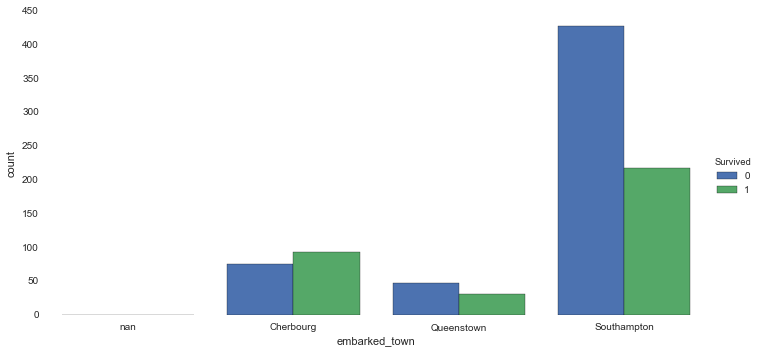

In [252]:
sns.factorplot("embarked_town", data=df_train, hue="Survived", aspect=2)
#embarked is port where boarded, likely correlated with Pclass?

In [253]:
#survived_by_sex = df_train.groupby("Pclass").Survived.agg(['sum','count'])
survived_by_embarked = df_train.groupby("embarked_town").Survived.agg(['sum','count'])
survived_by_embarked['survival_rate'] = survived_by_embarked['sum'] / survived_by_embarked['count']
survived_by_embarked

,sum,count,survival_rate
embarked_town,,,
Cherbourg,93,168,0.553571
Queenstown,30,77,0.389610
Southampton,217,644,0.336957


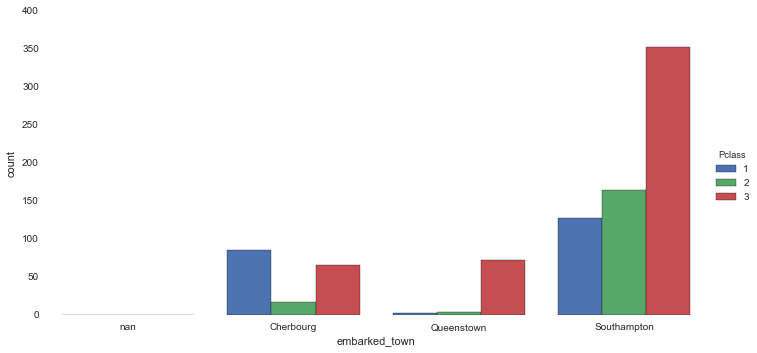

In [254]:
sns.factorplot("embarked_town", data=df_train, hue="Pclass", aspect=2)

In [255]:
#how many nan?
#print df_train['embarked_town'].info

In [256]:
#looks fairly correlated w/ Pclass... likely should not incude this in the model

#Viz Age

In [257]:
#explore null values

#list all
df_train.Age.isnull()

#list if null
df_train[df_train.Age.isnull()]

#shows how many other cols have data when Age is null -- not quite what we are looking for..
df_train[df_train.Age.isnull()].count()

#how to get count of just null values for age?

PassengerId      177
Survived         177
Pclass           177
Name             177
Sex              177
Age                0
SibSp            177
Parch            177
Ticket           177
Fare             177
Cabin             19
Embarked         177
embarked_town    177
dtype: int64

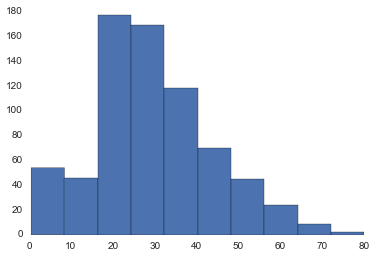

In [258]:
#plt.hist(df_train['Age'])
df_train.Age.hist()

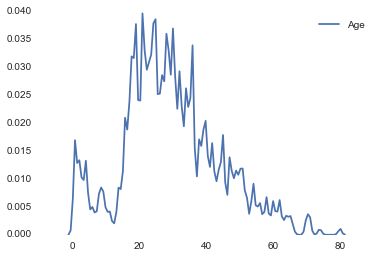

In [259]:
df_train['Age'].head()
#plt.hist(df_train['Age'])

sns.kdeplot(df_train['Age'], bw=0.5)
#sns.rugplot(df_train['Age'])

#sns.FacetGrid?

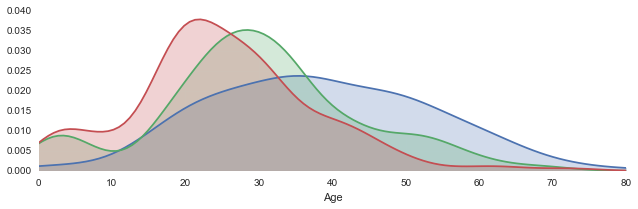

In [260]:
#function to see age distribution per Pclass
fg = sns.FacetGrid(df_train, hue="Pclass", aspect=3)
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0,80))

#how to add legend w/ PClass groups

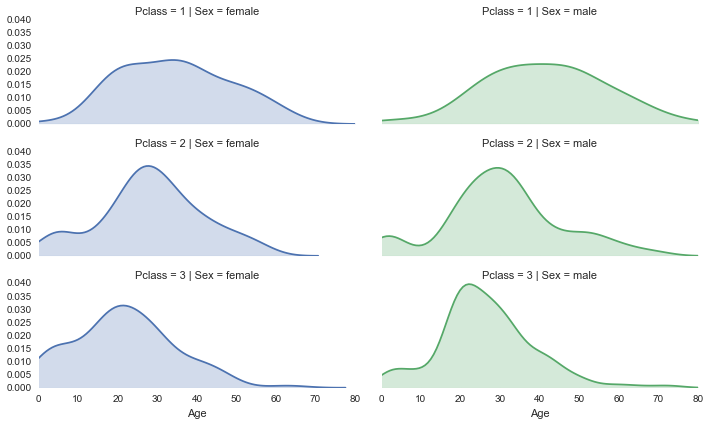

In [261]:
#Age in greater depth
fg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Sex", size=2, aspect=2.5)
fg.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True)
fg.set(xlim=(0,80))


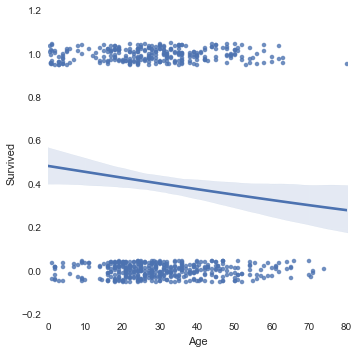

In [262]:
sns.lmplot("Age","Survived", df_train, logistic=True, y_jitter=0.05).set(xlim=(0,80))
#Age alone is not a good indicator

#sns.lmplot?

In [263]:
#mean values for age
print 'Mean Age:' , df_train.Age.mean()
print 'StDev Age: ' , df_train.Age.std()

#see age pivot table below for alternative inputs

Mean Age: 29.6991176471
StDev Age:  14.5264973323


In [264]:

mean_age = df_train.Age.mean()
stdev_age = df_train.Age.std()

#set random seed pre-function.. this works!
np.random.seed(100)

#create funciton w/ normal distrbution for age to draw from
def get_age_impute_values(n): 
    return np.random.normal( mean_age , stdev_age , n,  ) 

#np.random.normal?
#np.random?

'''
#NOTE: some ppl are getting an age VERY low ~4yo for married man...
Alternatives: 
  (A) take mean from group (eg Sex | Pclass)
  (B) Triangle distribution
''' 

'\n#NOTE: some ppl are getting an age VERY low ~4yo for married man...\nAlternatives: \n  (A) take mean from group (eg Sex | Pclass)\n  (B) Triangle distribution\n'

In [265]:
#create mask for missing entries
age_missing_mask = df_train.Age.isnull()

#outputs all values & total count of rows
age_missing_mask      # ==> 177 total rows

#we have 177 rows that have missing Age field
df_train[age_missing_mask].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Southampton
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Queenstown


In [266]:
#see df w/ some Age entries = null
df_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Queenstown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Southampton
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Cherbourg


In [267]:
#replace null values with numbers from distribution
df_train.loc[df_train.Age.isnull(), 'Age'] = get_age_impute_values(n=177)

#confirm that #6 is not assigned a number
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Southampton
5,6,0,3,"Moran, Mr. James",male,4.281154,0,0,330877,8.4583,NaN,Q,Queenstown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Southampton
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Cherbourg


In [268]:
#confirm via info()
df_train.info()
#NOTE all 'Age' is complete now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
embarked_town    889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [269]:
'''
#pivot table to find mean age for Sex | Pclass
df_train.pivot_table( df_train, values=df_train["Age"], 
                     index=df_train["Pclass"], columns=df_train["Sex"], 
                     aggfunc=np.mean)

#df_train.pivot_table?
'''

'\n#pivot table to find mean age for Sex | Pclass\ndf_train.pivot_table( df_train, values=df_train["Age"], \n                     index=df_train["Pclass"], columns=df_train["Sex"], \n                     aggfunc=np.mean)\n\n#df_train.pivot_table?\n'

#QUESTION: my pivot table function (to get mean age=f( sex, class) does not work, why?


In [272]:
#table to view signifiance of age... this time w/o null values (would not input)

#FAIL 1 df_train['Survived'].reset_index().pivot('index', df_train['Age')].hist()
#FAIL 2 - df_train['Age'].stack(0).hist()

#df_train.pivot('Sex','Pclass','Age').agg('mean')

#df_train.reset_index?
#df_train.pivot?

In [273]:
#TRY from: http://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_02/intro_pandas_titanic.ipynb
#table to view signifiance of age... this time w/o null values (would not input)

df_train.groupby(['Pclass','Sex'])['Age'].agg('mean')

#this works, but it isn't pretty, and hard to access the values

Pclass  Sex   
1       female    33.333572
        male      39.342020
2       female    28.534489
        male      30.726833
3       female    23.107990
        male      27.045193
Name: Age, dtype: float64

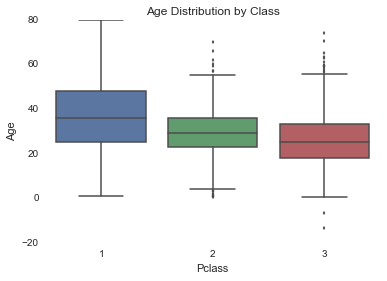

In [274]:
ax = sns.boxplot(df_train.Age, groupby=df_train.Pclass)
ax.set_title('Age Distribution by Class')

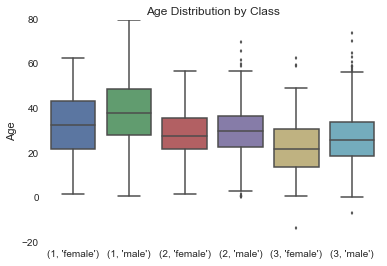

In [275]:
ax = sns.boxplot(df_train.Age, groupby=(df_train.Pclass,df_train.Sex) )
ax.set_title('Age Distribution by Class')

#QUESTION: how to make a stacked histogram (or area chart) where... (UNRESOLVED)
Y-axis = count of survived
X-axis = age
values = count survived, count not survived (thus there would be 2 sets of values in the plot stacked on top of each other

In [276]:
df_age_stack_survived = df_train.groupby('Survived')


(array([  85.,  131.,  265.,  204.,  117.,   60.,   20.,    6.,    1.,    0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

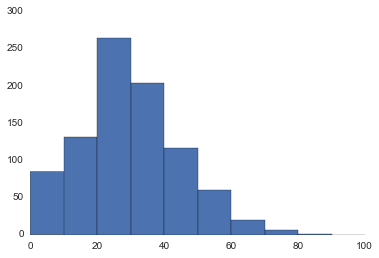

In [277]:
plt.hist(df_train['Age'], bins=10,range=(0,100), stacked=True)

In [278]:
#http://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
df_age_stack_hist = df_train.groupby(['Survived','Age'])['Age'].count()
df_age_stack_hist

Survived  Age       
0         -13.492742    1
          -6.430482     1
           0.425484     1
           1.000000     2
           1.255056     1
           2.000000     7
           3.000000     1
           4.000000     3
           4.281154     1
           4.523309     1
           4.936506     1
           5.140377     1
           6.000000     1
           6.259474     1
           6.319608     1
...
1         50.000000    5
          51.000000    2
          51.063439    1
          52.000000    3
          53.000000    1
          54.000000    3
          55.000000    1
          56.000000    2
          58.000000    3
          59.254839    1
          59.838595    1
          60.000000    2
          62.000000    2
          63.000000    2
          80.000000    1
Name: Age, Length: 319, dtype: int64

In [279]:
#plt.hist(df_age_stack_hist['0'], bins=10, range=(1,100), stacked=True)
#df_age_stack_hist[['0','1']].plot(kind='bar',stacked=True) #bins=10?
#df_test.Pclass.astype(str)

df_age_stack_hist.astype(str)


Survived  Age       
0         -13.492742    1
          -6.430482     1
           0.425484     1
           1.000000     2
           1.255056     1
           2.000000     7
           3.000000     1
           4.000000     3
           4.281154     1
           4.523309     1
           4.936506     1
           5.140377     1
           6.000000     1
           6.259474     1
           6.319608     1
...
1         50.000000    5
          51.000000    2
          51.063439    1
          52.000000    3
          53.000000    1
          54.000000    3
          55.000000    1
          56.000000    2
          58.000000    3
          59.254839    1
          59.838595    1
          60.000000    2
          62.000000    2
          63.000000    2
          80.000000    1
Name: Age, Length: 319, dtype: object

In [280]:
plt.hist(df_age_stack_hist["0"], bins=10, range=(1,100), stacked=True)


KeyError: '0'

In [ ]:
#assess significance of Age here...

# Viz Cabin & Deck

In [ ]:
#redefine cabine
df_train["Deck"] = df_train.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)

df_train.head(4)
#df_train = df_train.drop(["name", "ticket", "cabin"], axis=1)


In [ ]:
'''
#doesn't work... perhaps due to NaNs?
survived_by_deck = df_train.groupby("Deck").Survived.agg(['sum','count'])
survived_by_deck['survival_rate'] = survived_by_deck['sum'] / survived_by_deck['count']
survived_by_deck
'''

In [ ]:
sns.factorplot("Deck", data=df_train, hue="Pclass", aspect=2)


In [ ]:
#very correlated with Pclass
#Total count is quite low, and very low for Class 2 and Class 3...
# ==> perhaps there is another non-Deck class we are missing?

In [ ]:
sns.factorplot("Deck", data=df_train, hue="Survived", aspect=2)


In [ ]:
#Deck in greater depth

'''Does not work
fg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Survived", size=2, aspect=2.5)
fg.map(sns.factorplot, "Deck", data=df_train, hue="Survived")
#sns.despine(left=True)
'''

#Fare

In [ ]:
df_train['Fare'].hist(bins=100)

#df_train['Fare'].hist?

In [ ]:
df_train['Fare'].hist

In [ ]:
df_train['Fare'].hist

In [ ]:
plt.hist( df_train['Fare'])

In [ ]:
sns.lmplot("Fare" , "Survived" , df_train, logistic=True, y_jitter=0.05).set(
    xlim=(0,max(df_train["Fare"])))


In [ ]:
#df_train["fare_scale"] = np.scale( df_train['Fare'])
from sklearn.preprocessing import scale

#df_train["fare_scale"] = scale( df_train['Fare'])
df_train["fare_log"] = np.log(df_train['Fare'])

In [ ]:
df_train.head(2)

In [ ]:
df_train.describe().T
#cannot look at log values b/c some passengers for Fare are set to $0

In [ ]:
sns.lmplot("fare_scale" , "Survived" , df_train, logistic=True, y_jitter=0.05).set( 
    xlim=(min(df_train["fare_scale"]) ,max(df_train["fare_scale"])))

# Viz Summary Charts

In [ ]:
sns.factorplot("Pclass", "Survived", data=df_train, hue="Sex")

#Prepare Data for Model

In [ ]:
df_train.corr()

In [ ]:
df_train.head()

In [ ]:
#drop values not useful
#df_train = df_train.drop(["Name", "Ticket", "Cabin", "embark_town"], axis=1)
df_train.head()

In [ ]:
print np.count_nonzero(np.isnan(df_train['Age']))

In [ ]:
#print np.count_nonzero(np.isnan(df_train['Deck']))
def count_deck_NaN( cond, seq ): 
    return sum( 1 for x in seq if x == "NaN" )

print count_deck_NaN( "Nan" , df_train['Deck'])

useful cleaning link: 
http://nbviewer.ipython.org/github/jrgilbertson/titanic-predicting-disaster/blob/master/Titanic.ipynb

In [ ]:
df_train['Deck2'] = df_train['Deck']
df_train['Deck2'] = df_train['Deck2'].fillna('G') #assuming passengers w/o Deck are MOSTLY Pclass 3


In [ ]:
df_train.info()

In [ ]:
#how to define as a function of "Pclass" ?
#df_train['Deck2'] = df_train['Deck2'].fillna('G')
'''
#failed code attempt to  define as funciton of Pclass

for i in df_train['Deck']: 
    if np.isnan( i):
        print 'G'
    else: 
        print i
#df_train['Deck_new'] = 
'''

#Data Cleansing - Dummy Vars
Deck

In [ ]:
Deck_dummies = pd.get_dummies(df_train['Deck2'])
Deck_dummies.head(10)

In [ ]:
df_train = df_train.join(Deck_dummies)
df_train.head()

In [ ]:
#remove cabin G as control for model dummy_var
df_train = df_train.drop(['G'], axis=1)
df_train.head(1)

#Data Cleansing - Dummy Vars
Sex

In [ ]:
sex_dummies = pd.get_dummies(df_train['Sex'])
df_train = df_train.join(sex_dummies)
df_train.head(4)

In [ ]:
df_train = df_train.drop(['male'], axis=1)
df_train.head(4)

#Data Cleansing - Dummy vars
Class

In [ ]:
#class_dummies = pd.get_dummies(df_train['Pclass'])
#df_train = df_train.join(class_dummies)
#df_train.head(4)

In [ ]:
class_dummies = pd.get_dummies(df_train['Pclass'])
class_dummies.columns = ['C1' , 'C2' , 'C3']
class_dummies.head(1)

In [ ]:
df_train = df_train.join(class_dummies)


In [ ]:
#drop 3 as baseline 
df_train = df_train.drop(['C3'], axis=1)
df_train.head(4)

#Model

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [ ]:
#Create your model here
x_cols = ['C1', 'C2' , 'female' , 'Age' ] 
x_model_data = sm.tools.add_constant( df_train[x_cols])

x_model_data.info()

In [ ]:
x_model_data.head(1)

In [ ]:
y_data = df_train['Survived']
y_data.head(5)
#y_data.info() #this doesn't work

In [ ]:
#split data for cross-validation test
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    x_model_data, y_data, 
    test_size=0.2, random_state=1000)


#Model Logit (Broken)

In [281]:
logit_mdl = smf.Logit( y_train, X_train)

res = logit_mdl.fit()

#logit_mdl.fit?

Optimization terminated successfully.
         Current function value: 0.454143
         Iterations 6


In [282]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 Mar 2015   Pseudo R-squ.:                  0.3105
Time:                        17:36:54   Log-Likelihood:                -323.35
converged:                       True   LL-Null:                       -468.94
                                        LLR p-value:                 8.640e-62
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.6871      0.251     -6.731      0.000        -2.178    -1.196
x1             2.2699      0.270      8.407      0.000         1.741     2.799
x2             1.1889      0.254      4.681      0.000         0.691     1.687
x3             2.6513      0.211     12.577      0.000         2.238     3.064
x4            -0.0245      0.007     -3.341      0.001        -0.039    -0.010
==============================================================================
"""

In [283]:
#logit_mdl.predict(X_test)
print len(X_test)
print len(y_test)

179
179


In [316]:
x_model_data.head(5)

,const,C1,C2,female,Age
0,1,0,0,0,22
1,1,1,0,1,38
2,1,0,0,1,26
3,1,1,0,1,35
4,1,0,0,0,35


In [317]:
#logit_mdl.predict(df_train[x_model_data])
#logit_mdl.predict(X_test)


In [318]:
#logit_mdl.score( X_test, y_test)
#logit_mdl.score?

In [319]:
#shifting to model from new nbviewer for testing...
#http://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_02/intro_pandas_titanic.ipynb

#Model: LogisticRegression (Working)

In [320]:
from sklearn.linear_model import LogisticRegression


In [321]:
clf = LogisticRegression()

In [322]:
clf.fit( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [323]:
clf.score( X_test, y_test)

0.7988826815642458

In [324]:
#examine coef in new df
clf_coef = pd.DataFrame(zip(x_model_data.columns, np.transpose(clf.coef_) ))

In [325]:
clf_coef.rename(columns={0:'param',1: 'value'}, inplace=True)
clf_coef

,param,value
0,const,[-0.776174035693]
1,C1,[2.05391750901]
2,C2,[1.03745967745]
3,female,[2.48810207475]
4,Age,[-0.0233714535573]


In [326]:
clf_coef['odds_ratio'] = clf_coef['value'].map(np.exp)
clf_coef

,param,value,odds_ratio
0,const,[-0.776174035693],[0.4601632157]
1,C1,[2.05391750901],[7.7983916133]
2,C2,[1.03745967745],[2.82203901164]
3,female,[2.48810207475],[12.0384064293]
4,Age,[-0.0233714535573],[0.976899543559]


In [327]:
#odds ratio
#res.params.map(np.exp)


'''
INTERPRETATION... 
 VARIABLE ==> likelihood of survival  
 C1 ==> ~8x
 C2 ==> ~3x
 female ==> ~12x chance of survival
 age ==> Age+1 ~ +1x chance of survial  ... can calculate this for continuous variable?
'''

'\nINTERPRETATION... \n VARIABLE ==> likelihood of survival  \n C1 ==> ~8x\n C2 ==> ~3x\n female ==> ~12x chance of survival\n age ==> Age+1 ~ +1x chance of survial  ... can calculate this for continuous variable?\n'

In [328]:
#interpret clf LogisticRegression Model
from sklearn.metrics import confusion_matrix, classification_report

In [329]:
y_pred_clf = clf.predict( X_test)

In [330]:
confusion_matrix( y_test, y_pred_clf)

#http://en.wikipedia.org/wiki/Confusion_matrix
#rows - actual class
#cols - predicted class

array([[87, 13],
       [23, 56]])

In [331]:
print classification_report(y_test, y_pred_clf)

#classification_report?

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       100
          1       0.81      0.71      0.76        79

avg / total       0.80      0.80      0.80       179



In [332]:
#view predicted probabilities
y_pred_clf_df = pd.DataFrame(clf.predict_proba(X_test))

In [333]:
y_pred_clf_df.rename(columns={0:'No',1: 'Yes'}, inplace=True)
y_pred_clf_df['y_pred_clf'] = y_pred_clf
y_pred_clf_df['y_true'] = y_test
y_pred_clf_df.head(5)

,No,Yes,y_pred_clf,y_true
0,0.926488,0.073512,0,0
1,0.104490,0.895510,1,1
2,0.787432,0.212568,0,0
3,0.915147,0.084853,0,0
4,0.767217,0.232783,0,0


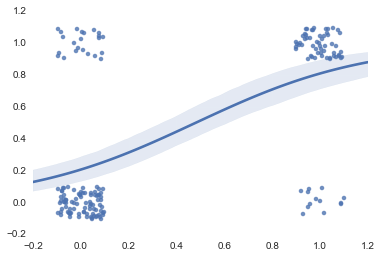

In [334]:
#map predicted value vs actual 
sns.regplot( y_pred_clf, y_test, x_jitter=0.1, y_jitter=0.1, logistic=True)

#sns.regplot?

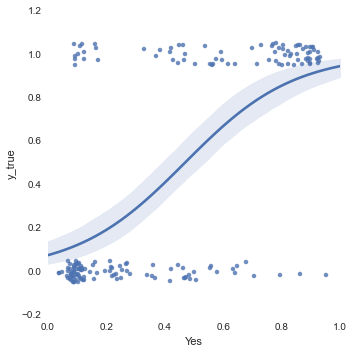

In [335]:
sns.lmplot("Yes","y_true", y_pred_clf_df, logistic=True, y_jitter=0.05).set(xlim=(0,1))

#Interpretation

[(-0.1, 1.1)]

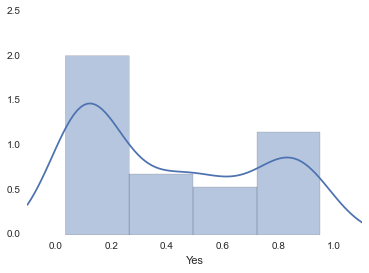

In [336]:
#map predicted likelihoold of survival
fg = sns.distplot(y_pred_clf_df['Yes'])
fg.set(xlim=(-0.1,1.1))

#Model 2: Logit (Broken) 
http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb

In [337]:
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


In [338]:

# The C() lets our regression know that those variables are categorical.
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'

# create a results dictionary to hold our regression results for easy analysis later        
results = {}

In [339]:
#create regresion freiendly dataframe
'''
y,x = dmatrices(formula, data=df_train, return_type='dataframe')

#instantiate the model
model = smf.Logit(y,x)

#fit model to training data
res = model.fit()

#save teh results for outputing predictions later
results['Logit'] = [res, formula]
res.summary()
'''

"\ny,x = dmatrices(formula, data=df_train, return_type='dataframe')\n\n#instantiate the model\nmodel = smf.Logit(y,x)\n\n#fit model to training data\nres = model.fit()\n\n#save teh results for outputing predictions later\nresults['Logit'] = [res, formula]\nres.summary()\n"

#Model 3: __type__ (WIP)
http://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_02/intro_pandas_titanic.ipynb

#How do I test my results?
There are a few ways to evaluate your model. One is by comparing it to the test set and calculating a prediction accuracy. This method would work if you have the outcome variable in your test set. Unfortunately for this dataset, Kaggle has withheld that, probably to prevent overfitting. You could also interpret it further by delving deeper into the summary information the model provides. This could involve looking at confidence intervals and odd ratios for the coefficients. 

In [340]:
'''
#Instructions for Kaggle submission format from this link: 
http://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_05/lab-05-logistics-reg-titanic.ipynb
'''

'\n#Instructions for Kaggle submission format from this link: \nhttp://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_05/lab-05-logistics-reg-titanic.ipynb\n'

In [341]:
#load data
df_test = pd.read_csv( 'test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [342]:
df_test.info()

#need to fix Age

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [343]:
#generate values for age
age_missing_mask_test = df_test.Age.isnull()
print sum(age_missing_mask_test)


86


In [344]:
df_test.loc[age_missing_mask_test, 'Age'] = get_age_impute_values(86)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [345]:
#convert Pclass to text to ease creation of dummies 
df_test['Pclass'] = df_test.Pclass.astype(str)
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [346]:
X_new = df_test[['Pclass', 'Sex', 'Age']]
X_new = pd.get_dummies(X_new)
X_new.head(1)

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,34.5,0,0,1,0,1


In [347]:
#df_train = df_train.drop(['C3'], axis=1)
X_new = X_new.drop( ['Pclass_3' , 'Sex_male'], axis=1)
X_new.head(1)


,Age,Pclass_1,Pclass_2,Sex_female
0,34.5,0,0,0


In [348]:
#add constant
#x_model_data = sm.tools.add_constant( df_train[x_cols])

X_new = sm.tools.add_constant(X_new)
X_new.head(1)

,const,Age,Pclass_1,Pclass_2,Sex_female
0,1,34.5,0,0,0


In [349]:
y_pred_clf_new = clf.predict(X_new)

In [350]:
submission = pd.DataFrame(
    {'PassengerId' : df_test.PassengerId, 'Survived' : y_pred_clf_new} 
    )

In [351]:
submission.tail(10)
#something is wrong... #may be that column-order matters. prev: constant, PC1, PC2, Female, Age

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,1
414,1306,1
415,1307,1
416,1308,1
417,1309,1


In [352]:
#reset col
#http://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
cols = X_new.columns.tolist()
cols

['const', 'Age', 'Pclass_1', 'Pclass_2', 'Sex_female']

In [353]:
#cols = cols['const'] + cols['Pclass_1'] + cols['Pclass_2'] + cols['Sex_female'] #does not work
#cols = cols[0] + cols[2] + cols[3] + cols[4] + cols[1] #does not work... outputs to single list: '#cols = cols[0] + cols[2] + cols[3] + cols[4] + cols[1] 
cols = cols[0:1] + cols[2:5] + cols[1:2] 

cols

['const', 'Pclass_1', 'Pclass_2', 'Sex_female', 'Age']

In [354]:
#reset X_new
X_new_test = X_new[cols]
X_new_test.head(1)

,const,Pclass_1,Pclass_2,Sex_female,Age
0,1,0,0,0,34.5


In [355]:
#rerun model w/ updated col nbrs
y_pred_clf_new = clf.predict(X_new_test)

In [356]:
submission = pd.DataFrame(
    {'PassengerId' : df_test.PassengerId, 'Survived' : y_pred_clf_new} 
    )


In [357]:
submission.head(10)
#this looks much better

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [358]:
print submission.Survived.sum() 
print len(submission.index)

152
418


In [359]:
print (149.0 / 418)

0.356459330144


In [360]:
''' TURNED OFF WHILE EXPERIMENTING
#send to csv w/o index row #s
submission.to_csv('submission.csv',index=False)
'''

" TURNED OFF WHILE EXPERIMENTING\n#send to csv w/o index row #s\nsubmission.to_csv('submission.csv',index=False)\n"

(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

If you do submit on Kaggle, post your Kaggle accuracy on Hipchat and see how you compare to your classmates!

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*

In [361]:
#print scored from Kaggle

#Notes:
- There is missing data that you may want to remove before you begin running your analysis.
- Beware of overfitting! Sometimes a good prediction accuracy with the test set may not necessarily translate to the best result you would get on Kaggle.
